# Finding the Distance Between Two Points

In [1]:
import numpy as np



In [2]:
p1 = np.array([1,1])
p2 = np.array([4,4])

p2 - p1


array([3, 3])

In [3]:
np.power(p2-p1, 2)


array([9, 9])

In [4]:
np.sum(np.power(p2-p1, 2))


18

In [5]:
np.sqrt(np.sum(np.power(p2-p1, 2)))


4.242640687119285

In [6]:
def distance(p1, p2):
    '''
    Find the distance between points 
    p1 and p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])

distance(p1, p2)

4.242640687119285

#### Introduction to kNN Classification: Question 1

How does the k-Nearest Neighbors classifier classify observations?

- *According to the most common class among the nearest k neighbors**
- According to the mean class among the nearest k neighbors

#### Finding Distance: Question 1

How is the distance measure we use (as in Video 3.3.2) defined between points (a1, b1) and (a2, b2) ?
- $\ |a_1-a_2| + |b_1-b_2|$

- $\ (a_1-a_2)^2 + (b_1-b_2)^2$

- $\ \sqrt{(a_1-a_2)^2 + (b_1-b_2)^2}$ [X]

- $\ \sqrt{(a_1-a_2)^2 - (b_1-b_2)^2}$

# Majority Vote

In [7]:
def magority_vote(votes):
    '''
    Inspect vote counts. The key is the number and the 
    values are the number of each number in key occured.
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts


In [8]:

votes = [1,2,3,1,2,3,1,2,3,3,3,3]
vote_counts = magority_vote(votes)
vote_counts


{1: 3, 2: 3, 3: 6}

In [20]:
max(vote_counts)

3

In [21]:
max(vote_counts.keys())

3

In [22]:
max(vote_counts.values())

6

In [23]:
max_counts = max(vote_counts.values())
max_counts


6

In [24]:

winners = []
max(vote_counts.values())
for vote, count in vote_counts.items():
    print (vote, count)


1 3
2 3
3 6


In [25]:

winners = []
max_count = max(vote_counts.values())
for vote, count in vote_counts.items():
    if count == max_count:
        winners.append(vote)
winners


[3]

In [13]:

import random

def magority_vote(votes):
    '''
    Finds the winner. If there is a tie among winners, the 
    program choose radomly
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)


In [14]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]
winner = magority_vote(votes)
winner


3

In [15]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3, 2, 2, 2]
winner = magority_vote(votes)
winner


3

In [16]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3, 2, 2, 2]
winner = magority_vote(votes)
winner


2

In [17]:
import scipy.stats as ss

def majority_votes_short(votes):
    '''
    Return the most common element in votes
    '''
    mode = ss.mstats.mode(votes)
    return mode


In [18]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]
winner = majority_votes_short(votes)
winner


ModeResult(mode=array([3.]), count=array([6.]))

In [19]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_votes_short(votes)
winner

ModeResult(mode=array([2.]), count=array([6.]))

# Finding Nearest Neighbors

In [26]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
points


array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]])

In [31]:
points[:,0]

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [32]:
points[:,1]

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [27]:
p = np.array([2.5, 2])
p


array([2.5, 2. ])

In [29]:
import matplotlib.pyplot as plt

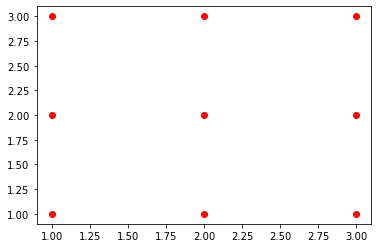

In [30]:
plt.plot(points[:,0], points[:,1], 'ro')
plt.show()


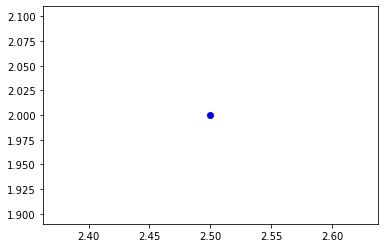

In [33]:
plt.plot(p[0], p[1], 'bo')
plt.show()


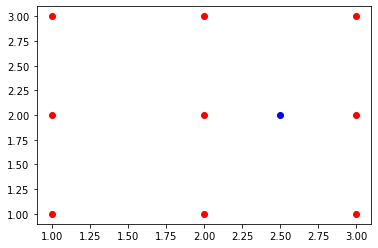

In [34]:
plt.plot(points[:,0], points[:,1], 'ro')
plt.plot(p[0], p[1], 'bo')
plt.show()


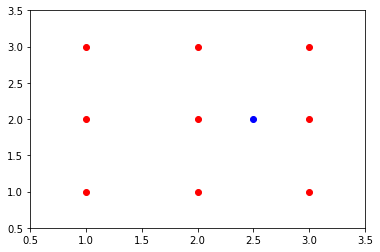

In [35]:
plt.plot(points[:,0], points[:,1], 'ro')
plt.plot(p[0], p[1], 'bo')
plt.axis([0.5,3.5,0.5,3.5])
plt.show()


In [36]:
distances = np.zeros(points.shape[0])

distances


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
distances = np.zeros(points.shape[0])
#loop over all points
for i in range(len(distances)):
    #compute the distance beetween point p and every other point
    distances[i] = distance(p, points[i])

distances


array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [38]:
points[4]


array([2, 2])

In [39]:
distances[4]


0.5

In [40]:
points[7]


array([3, 2])

In [41]:
distances[7]


0.5

In [42]:
np.argsort(distances)

ind = np.argsort(distances)

ind


array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [43]:
distances[ind]


array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [44]:
distances[ind[0:2]]

array([0.5, 0.5])

In [45]:
def find_nearest_neighbors(p, points, k = 5):
    '''
    Find the k nearest neighbors of point p and return their indices.
    '''
    distances = np.zeros(points.shape[0])
    #loop over all points
    for i in range(len(distances)):
        #compute the distance beetween point p and every other point
        distances[i] = distance(p, points[i])
    #sort distances and return those k points that are the nearest to point p
    ind = np.argsort(distances)
    return ind[:k]


In [46]:
p = find_nearest_neighbors(p, points, k = 2)
p


array([4, 7])

In [47]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])
ind = find_nearest_neighbors(p, points, k = 2)
print(points[ind])


[[2 2]
 [3 2]]


In [48]:

points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])
ind = find_nearest_neighbors(p, points, k = 3)
print(points[ind])


[[2 2]
 [3 2]
 [2 1]]


In [49]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])
ind = find_nearest_neighbors(p, points, k = 4)
print(points[ind])


[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [50]:
def knn_predict(p, points, outcomes, k = 5):
    #find the k nearest neighbors
    ind = find_nearest_neighbors(p, points, k = 5)
    #predict the class of p based on the majority votes
    return magority_vote(outcomes[ind])


In [51]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])
len(outcomes)


9

In [52]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
knn_predict(np.array([2.5, 2.7]), points, outcomes, k = 2)


1

In [53]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
knn_predict(np.array([1.0, 2.7]), points, outcomes, k = 2)

0

#### Finding Nearest Neighbors: Question 1

For an ```np.array``` of dimension 2, what does the shape method return?

- The number of rows
- The number of columns
- **A tuple containing the number of rows and columns**
- A list containing the number of rows and columns

#### Finding Nearest Neighbors: Question 2

What does ```np.argsort``` do?

- It sorts an array, provided its elements are arguments.
- It sorts an array according to a single argument and returns a sorted list.
- **It sorts an array according to a single argument and returns the sorted indices.**
- It will try to sort a list, and if it can't, it will argue with you.

# Generating Synthetic Data


In [54]:
import scipy.stats as ss


In [55]:
ss.norm(0,1).rvs((5,2))  #norm(mean, standard_deviation)

array([[-1.85778728, -0.33409173],
       [-0.12997814,  1.63905814],
       [ 0.72212807,  0.01368983],
       [ 2.20220072, -0.17459577],
       [ 2.02760966, -0.29522316]])

In [56]:
ss.norm(1,1).rvs((5,2))

array([[ 0.93096245, -0.89377361],
       [-0.77774417,  1.38916055],
       [-0.21024325,  2.79400268],
       [ 0.45170529,  2.60612296],
       [-0.58833073,  1.33159737]])

In [57]:
a = ss.norm(0,1).rvs((5,2))
b = ss.norm(1,1).rvs((5,2))
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))),axis = 0)

array([[-0.69404668, -0.02693945],
       [ 1.10560566,  1.99275998],
       [-1.03372549, -0.80361695],
       [-2.56509407,  1.80395715],
       [ 0.52780701,  0.27524502],
       [-0.11014181,  1.57791537],
       [ 1.67157518,  2.45374559],
       [ 1.15896833,  1.84932544],
       [ 1.45444789, -0.05043672],
       [ 1.49697757,  0.55120999]])

In [58]:
n = 5
a = np.repeat(0,n)
b = np.repeat(1, n)
np.concatenate((np.repeat(0,n),np.repeat(1,n)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [59]:
def generate_syth_data(n = 50):
    '''
    Create two sets of points from bivariate normal distribution.
    '''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

In [60]:
n = 20
(points, outcomes) =  generate_syth_data(n)

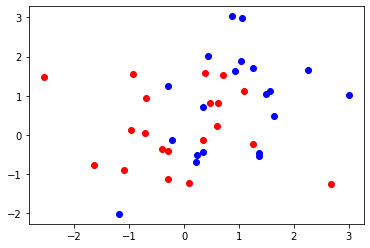

In [61]:
plt.figure()
plt.plot(points[:n, 0], points[:n, 1], 'ro')
plt.plot(points[n:, 0], points[n:,1], 'bo')
plt.savefig("binarydata.pdf")
plt.show()

#### Generating Synthetic Data: Question 1

What does ```np.concatenate``` do?

- **Takes in a tuple of ```np.array``` and joins them lengthwise along the specified axis**
- Takes in a single ```np.array``` and concatenates itself to itself along the specified axis
- Takes in a tuple of ```np.arrays``` and sums them along the specified axis

#### Generating Synthetic Data: Question 2

Do you expect the k-Nearest Neighbors to categorize new values in the synthetic data perfectly?

- Yes, because the data are generated according to a true and known model.
- **No, because the data contain some observations with a majority of neighbors in another category.**

# Making A Prediction Grid

In [68]:
def make_prediction_grid(predictors, outcomes,limits, h, k):
    '''
    Classify each point on the pridiction grid.
    '''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

In [63]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

#### Making a Prediction Grid: Question 1

What does ```np.arange``` do?

- Takes a tuple of ```np.arrays``` as the first argument and arranges them according to the second argument
- **Creates regularly spaced values between the first and second argument, with spacing given in the third argument**
- Takes a ```range``` object and returns an ```np.array``` range object

#### Making a Prediction Grid: Question 2

What does ```enumerate``` do?

- Takes an iterable and returns a range object
- **Takes an iterable and returns a new iterable with tuples as elements, where the first index of each tuple is the index of the tuple in the iterable**
- Takes iterables as arguments and returns an array of the total number of elements in each iterable
- Takes iterables as arguments and returns an integer of the total number of elements in all iterables

In [73]:
def distance(p1, p2):
    '''
    Find the distance between points 
    p1 and p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

def magority_vote(votes):
    '''
    Finds the winner. If there is a tie among winners, the 
    program choose radomly
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

def find_nearest_neighbors(p, points, k = 5):
    '''
    Find the k nearest neighbors of point p and return their indices.
    '''
    distances = np.zeros(points.shape[0])
    #loop over all points
    for i in range(len(distances)):
        #compute the distance beetween point p and every other point
        distances[i] = distance(p, points[i])
    #sort distances and return those k points that are the nearest to point p
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k = 5):
    #find the k nearest neighbors
    ind = find_nearest_neighbors(p, points, k)
    #predict the class of p based on the majority votes
    return magority_vote(outcomes[ind])

def generate_syth_data(n = 50):
    '''
    Create two sets of points from bivariate normal distribution.
    '''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

def make_prediction_grid(predictors, outcomes,limits, h, k):
    '''
    Classify each point on the pridiction grid.
    '''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [74]:
(predictors, outcomes) =  generate_syth_data()

In [75]:
predictors.shape

(100, 2)

In [76]:
outcomes.shape

(100,)

<ipython-input-73-95f24aabfe85>:78: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


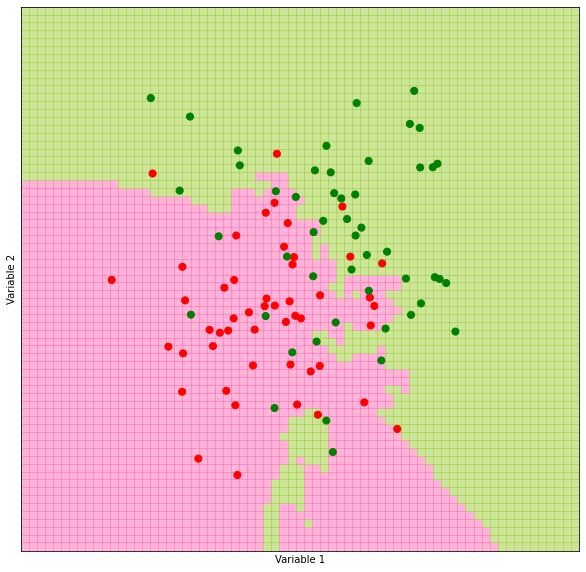

In [77]:
k = 5; filename = 'knn_syth_5.pdf'; limits = (-3, 4, -3 , 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

<ipython-input-73-95f24aabfe85>:78: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


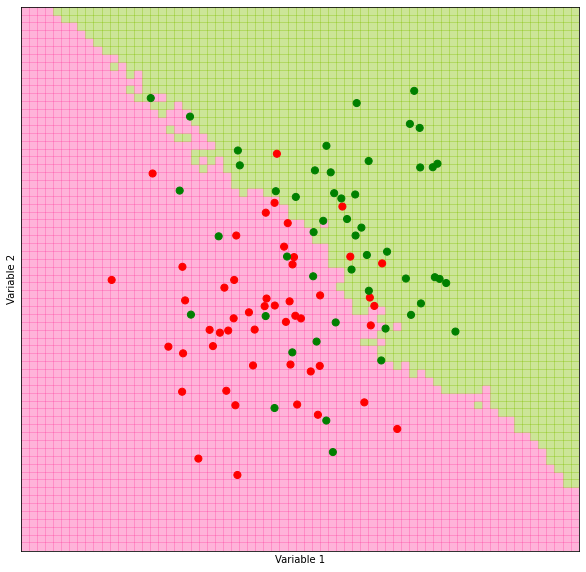

In [78]:
k = 50; filename = 'knn_syth_50.pdf'; limits = (-3, 4, -3 , 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

# Applying The kNN Method


In [79]:
from sklearn import datasets


In [80]:
iris = datasets.load_iris()

In [81]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [82]:
predictors = iris.data[:, 0:2] #we want all rows and columns 0 and 1
outcomes = iris.target
outcomes.shape

(150,)

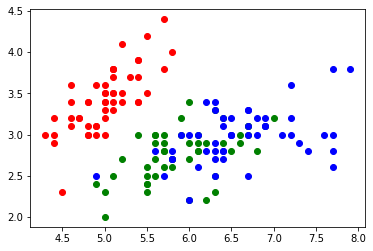

In [83]:
#x coordinates = all rows column 0 , y coordinates = all rows column 1
#3 species, 3 outcomes
plt.plot(predictors[outcomes == 0] [:,0], predictors[outcomes == 0] [:,1], 'ro')
plt.plot(predictors[outcomes == 1] [:,0], predictors[outcomes == 1] [:,1], 'go')
plt.plot(predictors[outcomes == 2] [:,0], predictors[outcomes == 2] [:,1], 'bo')
plt.savefig('irish.pdf')

plt.show()

<ipython-input-73-95f24aabfe85>:78: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


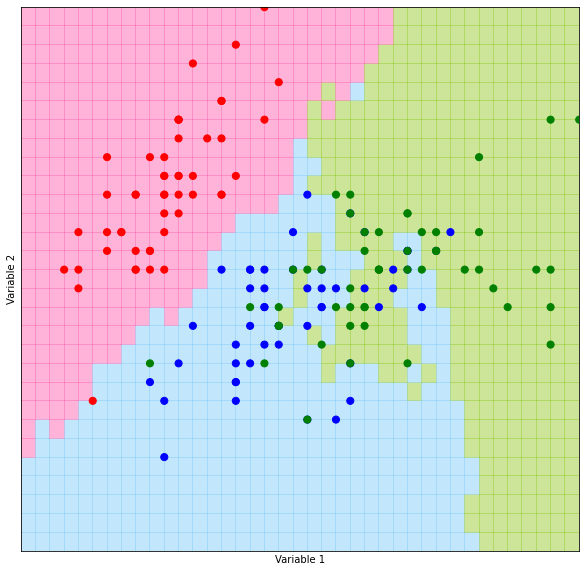

In [84]:
k = 5; filename = 'irish_grid.pdf'; limits = (4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [86]:
sk_predictions.shape

(150,)

In [87]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [89]:
my_predictions.shape

(150,)

In [90]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [91]:
np.mean(sk_predictions == my_predictions)

0.96

In [92]:
100 * np.mean(sk_predictions == my_predictions)

96.0

In [93]:
100 * np.mean(sk_predictions == outcomes)

83.33333333333334

In [94]:
100 * np.mean(my_predictions == outcomes)

84.66666666666667

#### Applying the kNN Method: Question 1

What are the four variables in the iris dataset described in Video 3.3.8?

- Sepal length, sepal width, iris length, iris width
- **Sepal length, sepal width, petal length, petal width**
- Stamen length, stamen width, iris length, iris width
- Stamen length, stamen width, petal length, petal width

#### Applying the kNN Method: Question 2

How many different species are contained in the iris dataset described in Video 3.3.8?

- **3**
- 4
- 5
- 6

#### Applying the kNN Method: Question 3

How often do the predictions from the homemade and scikit-learn kNN classifiers accurately predict the class of the data in the iris dataset described in Video 3.3.8?

- Approximately 65% of the time
- Approximately 75% of the time
- **Approximately 85% of the time**
- Approximately 95% of the time